## Louisiana Coastal Erosion

In [1]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
from shapely.geometry import Point, LineString, Polygon
from pylab import *
import random
import math
import pandas as pd

In [2]:
# get current directory
path = os.getcwd()

# Import shapefile using geopandas - in this case path file refers to tree locations
noaa_plot_locations = gpd.read_file(os.path.abspath('noaa_composite\composite_shoreline_final.shp'))

In [3]:
# what our shapefile looks like as a geo-DF
noaa_plot_locations.head()

,F_NAME,F_CODE,INDEX_,T_SHEET_,SURVEYDATE,GISDATE,SCALE,Shape_Leng,geometry
0,State Boundary,-9997,None,None,None,None,0,1.459687,"LINESTRING (-79.76194 42.26986, -79.76061 42.2..."
1,State Boundary,-9997,None,None,None,None,0,1.984519,"LINESTRING (-92.16538 46.70930, -92.16099 46.7..."
2,None,0,None,None,None,None,0,0.009761,"LINESTRING (-78.55098 33.85966, -78.55835 33.8..."
3,None,0,None,None,None,None,0,0.009761,"LINESTRING (-78.55098 33.85966, -78.55835 33.8..."
4,None,0,None,None,None,None,0,0.001347,"LINESTRING (-78.55937 33.86694, -78.55835 33.8..."


In [4]:
# our data is linestring type
noaa_plot_locations.head().geom_type

0    LineString
1    LineString
2    LineString
3    LineString
4    LineString
dtype: object

In [5]:
# View CRS of object - we know we are working with 'epsg:4269'
noaa_plot_locations.crs

{'init': 'epsg:4269'}

In [6]:
# View the spatial extent - this is the range of cordinates available in our shapfile
noaa_plot_locations.total_bounds

array([-173.97369014,   17.67392956,  -64.56501003,   49.00235311])

## Displaying GIS Maps 

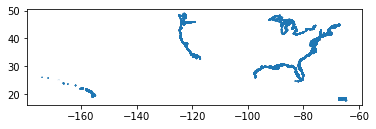

In [7]:
# plot of all data points included in dataset
noaa_plot_locations.plot();

In [8]:
# choose values to create box that will filter geoDF
box = {'Name': ['lowerleft', 'upperleft', 'upperright', 'lowerright'], 'geometry': [Point(-95,28), Point(-95,31),Point(-88,31), Point(-88,28)]}
# make a bounding box DF
boundingbox = gpd.GeoDataFrame(box, crs="epsg:4269")

# using total bounds attribute, extract each bound
xmin, ymin, xmax, ymax = boundingbox.total_bounds
LouisianaCoast = noaa_plot_locations.cx[xmin:xmax, ymin:ymax] # filter our Noaa DF 

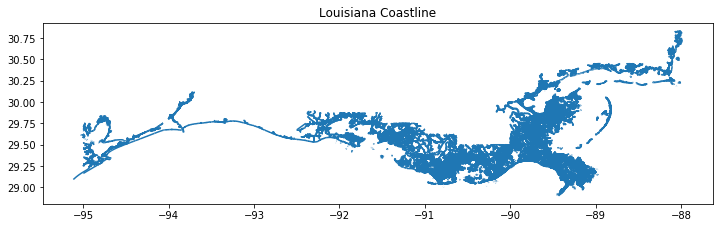

In [9]:
# plot by defining ax axis
fig, ax1 = plt.subplots(figsize = (12,8))

# Plot the data using geopandas .plot() method
LouisianaCoast.plot(ax=ax1)
plt.title('Louisiana Coastline')
plt.show();

In [10]:
# choose values to create box that will filter geoDF
box = {'Name': ['lowerleft', 'upperleft', 'upperright', 'lowerright'], 'geometry': [Point(-90.5,28), Point(-90.5,31),Point(-89.8,31), Point(-89.8,28)]}
# make a bounding box DF
boundingbox = gpd.GeoDataFrame(box, crs="epsg:4269")

# using total bounds attribute, extract each bound
xmin, ymin, xmax, ymax = boundingbox.total_bounds
SouthernLA = noaa_plot_locations.cx[xmin:xmax, ymin:ymax] # filter our Noaa DF 

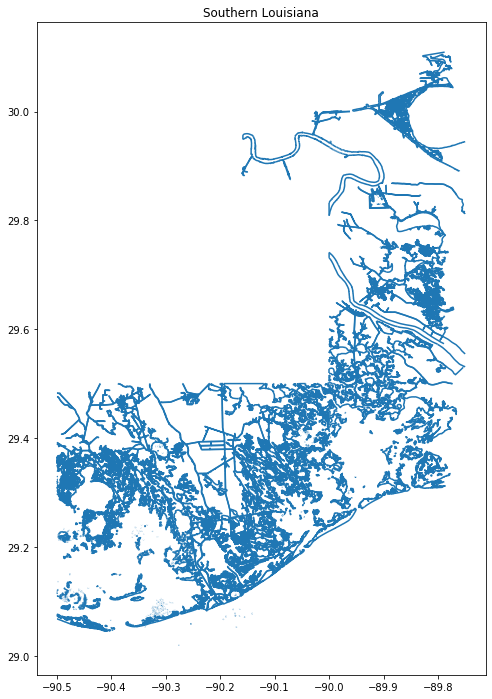

In [11]:
# plot by defining ax axis
fig, ax1 = plt.subplots(figsize = (12,12))

# Plot the data using geopandas .plot() method
SouthernLA.plot(ax=ax1)
plt.title('Southern Louisiana')
plt.show();

In [12]:
# Filter again to only include Grand Isle
box = {'Name': ['lowerleft', 'upperleft', 'upperright', 'lowerright'], 'geometry': [Point(-90.1,29.15), Point(-90.1,29.3),Point(-89.9,29.3), Point(-89.9,29.15)]}
# make a bounding box DF
boundingbox = gpd.GeoDataFrame(box, crs="epsg:4269")

# using total bounds attribute, extract each bound
xmin, ymin, xmax, ymax = boundingbox.total_bounds
GrandIsle = noaa_plot_locations.cx[xmin:xmax, ymin:ymax] # filter our Noaa DF 

## Simulating the "Random Walk" Method

Below we simulate the random walk method outlined by Dr. Gary Shaffer of Southeastern Louisiana University. Due to the pseudo-randomized placement of trees, dense roots and branches act as obstacles and help attenuate storm surge.

,geometry
0,POINT (-90.03868 29.18156)
1,POINT (-90.03732 29.18124)
2,POINT (-90.03592 29.18129)
3,POINT (-90.03461 29.18178)
4,POINT (-90.03330 29.18127)


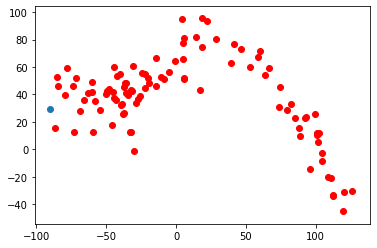

In [52]:
origin = [-90,29.2]
scatter(origin[0], origin[1])

#radius of the circle
circle_r = 14
#center of the circle (x,y)
circle_x = -90
circle_y = 29.2

xcords = []
ycords = []
    
for i in range(100):
    # random angle 
    alpha = 2 * math.pi * random.random()
    # random radius
    r = 14
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    
    circle_x = x
    circle_y = y
    
    # append cordinates to lists
    xcords.append(x)
    ycords.append(y)
    
    scatter(x,y, c = 'r')
    
# make cordinates into a DF
cordinates = pd.DataFrame(list(zip(xcords, ycords)), 
               columns =['x_cords', 'y_cords']) 

# scale points so it matches longitude and latitude cordinates
cordinates['x_cords'] = (cordinates.x_cords * .0001) - 90.03  # where 90 and 29.2 are the orgin
cordinates['y_cords'] = (cordinates.y_cords * .0001) + 29.18

# add geometry column to DF containing shapley Points
cordinates["geometry"] = cordinates[["x_cords", "y_cords"]].apply(Point, axis=1)

# save tree locations to a geo dataframe
tree_locations = gpd.GeoDataFrame(cordinates.geometry, 
                                  columns=['geometry'],
                                  crs= 'epsg:4269')
tree_locations.head(5)

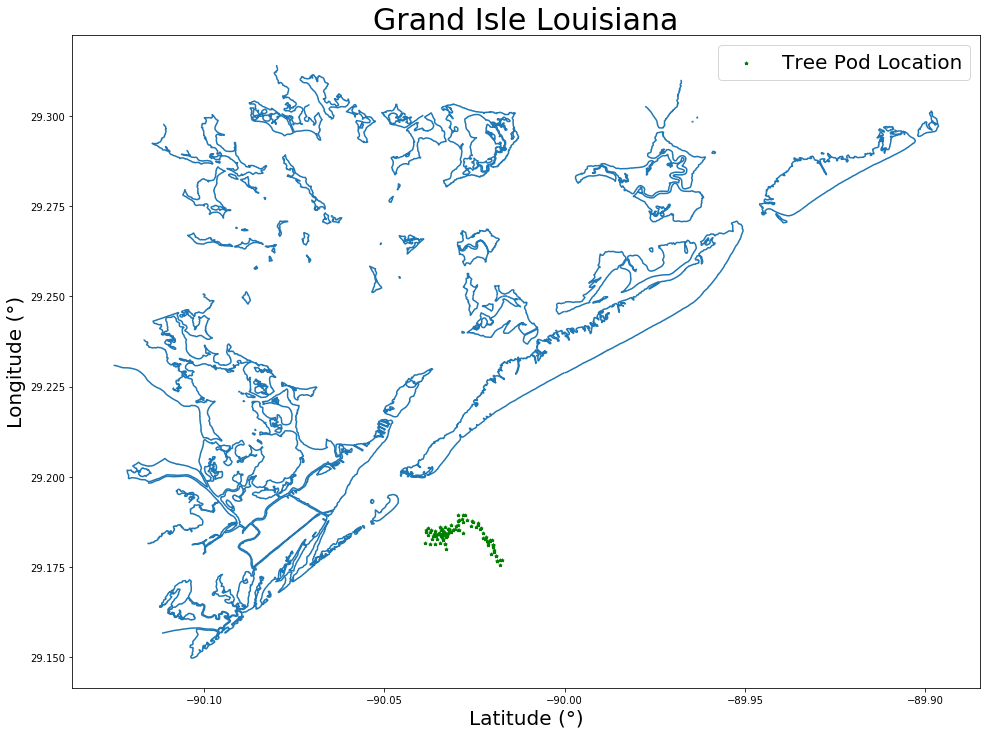

In [53]:
# Cordinates of Grand Isle
GI = Point(29.23284,  -89.9975)

# define plot 
fig, ax1 = plt.subplots(figsize = (20,12))

# Plot Grand Isle map
GrandIsle.plot(ax=ax1)
plt.title('Grand Isle Louisiana', fontsize=30)

# add tree location
tree_locations.plot(ax=ax1, color='green', marker='*', markersize=10, label = 'Tree Pod Location')

plt.xlabel('Latitude (°)', fontsize = 20)
plt.ylabel('Longitude (°)', fontsize = 20)
plt.legend(fontsize=20)
plt.show();